## Axelrod's Tournament

Axelrod's Tournament, proposed by political scientist Robert Axelrod in 1984, is a seminal study in evolutionary game theory. It investigates strategies for cooperation and the emergence of cooperation in repeated interactions, using the iterated prisoner's dilemma as the core game.

### Objective
The objective of Axelrod's Tournament is to explore which strategies are most effective in promoting cooperation and achieving high payoffs in repeated prisoner's dilemma interactions.

### Setup
- **Participants:** Various computer programs representing different strategies.
- **Game:** The iterated prisoner's dilemma, where two players repeatedly choose to cooperate or defect.
- **Scoring:** Participants' strategies are evaluated based on their cumulative payoff across multiple rounds of interactions.

### Key Findings
- **Tit-for-Tat:** The tournament demonstrated the effectiveness of the tit-for-tat strategy, which starts by cooperating and then mirrors the opponent's previous move.
- **Complex Strategies:** While simple strategies performed well, more sophisticated strategies that adapt to opponent behavior also achieved success.
- **Evolution of Cooperation:** Axelrod's Tournament showed that cooperation can emerge and persist in competitive environments through the adoption of reciprocal and forgiving strategies.

### Significance
- Axelrod's Tournament has had a profound impact on the study of cooperation, game theory, and evolutionary dynamics.
- Its findings have applications in biology, economics, political science, and computer science, informing research on cooperation and conflict resolution.

Axelrod's Tournament remains a landmark study, providing insights into the mechanisms underlying cooperation and the strategies that facilitate its emergence in competitive environments.


In [77]:
#%pip install axelrod

In [78]:
import axelrod as axl
import matplotlib.pyplot as plt
import numpy as np

In [79]:
# Define a list of players
players = [
    axl.Cooperator(), 
    axl.Defector(), 
    axl.TitForTat(), 
    axl.Grudger(),
]

Analysing: 100%|██████████| 25/25 [00:00<00:00, 214.04it/s]
C:\Users\Anshul Jawale\AppData\Local\Temp\ipykernel_3352\2204084032.py:7: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plot.pdplot().show()
C:\Users\Anshul Jawale\AppData\Local\Temp\ipykernel_3352\2204084032.py:9: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  p.show()


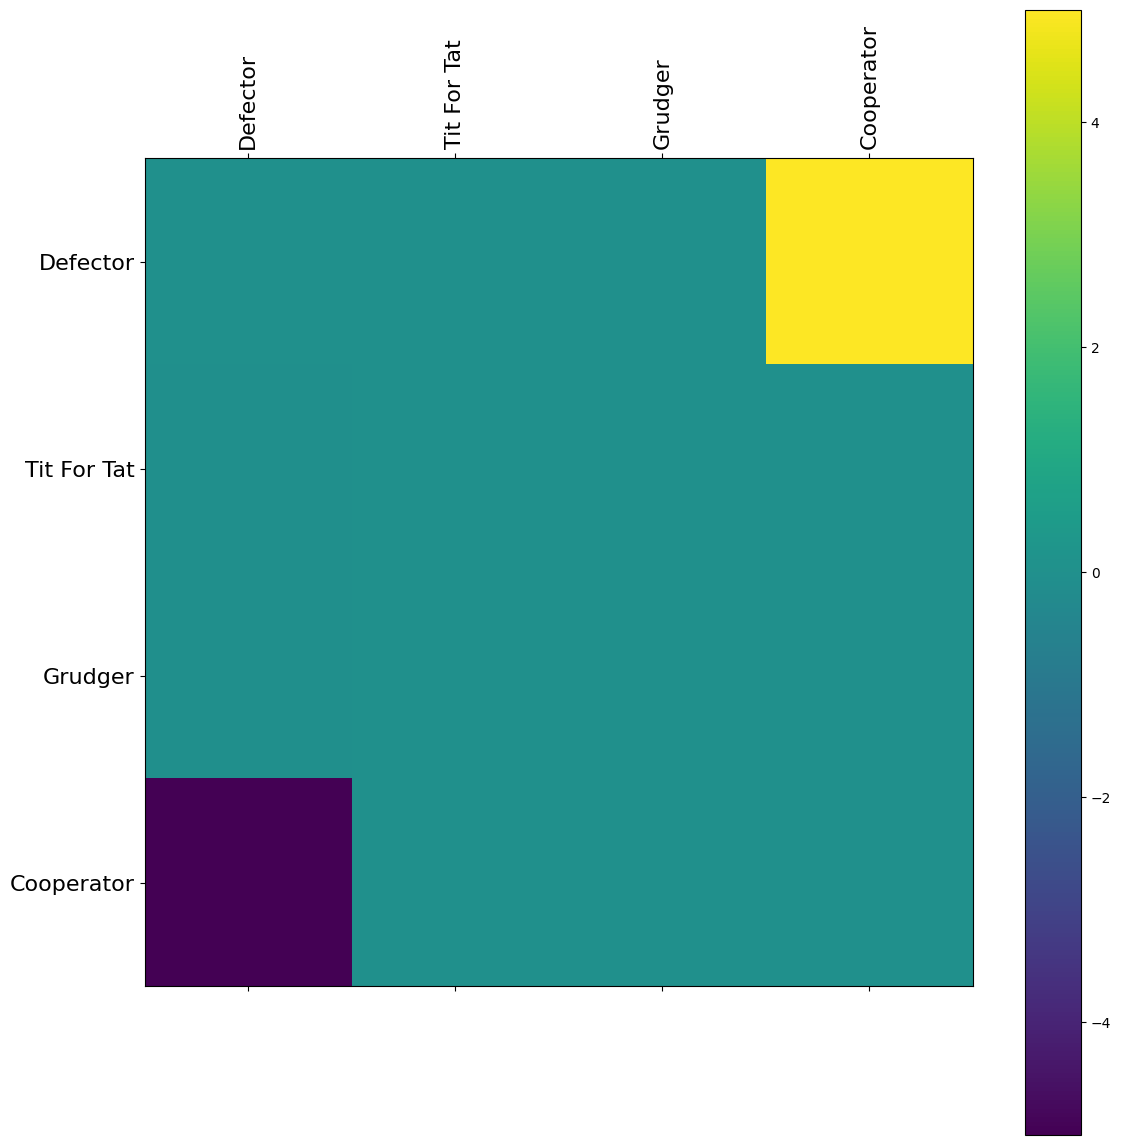

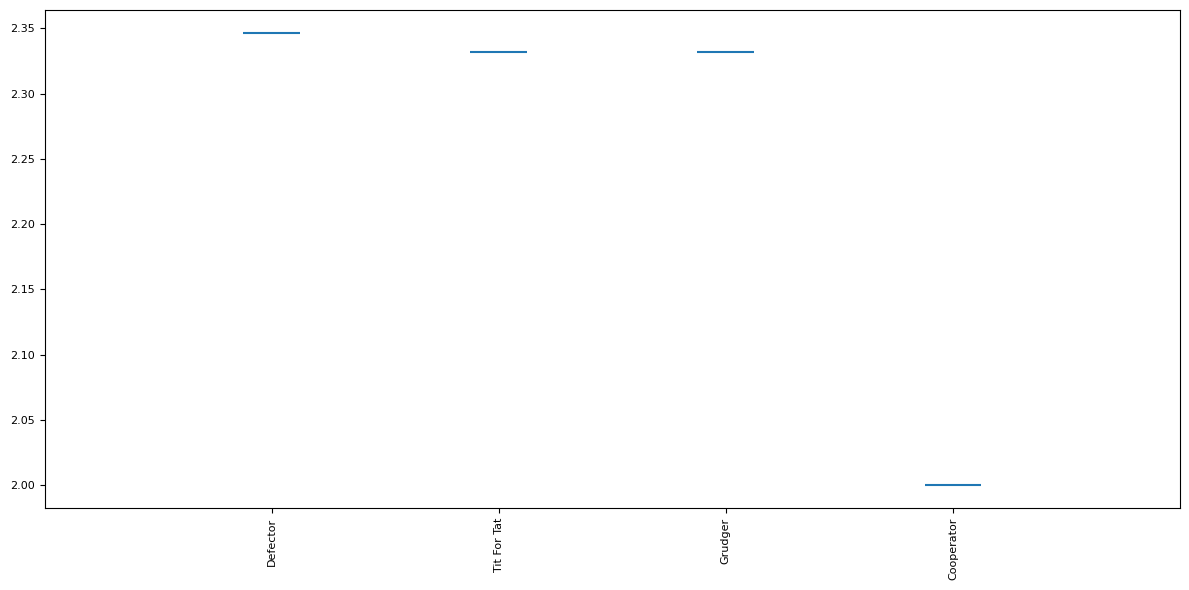

In [80]:
# Instantiate a Tournament object
tournament = axl.Tournament(players)

# Play the tournament
results = tournament.play()
plot = axl.Plot(results)
plot.pdplot().show()
p = plot.boxplot()
p.show()

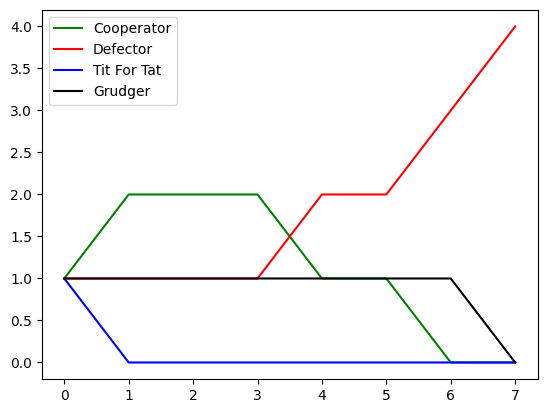

In [81]:
mp = axl.MoranProcess(players)
results = mp.play()
p1, p2, p3, p4 = [], [], [], []
for i in results:
    p1.append(i['Cooperator'])
    p2.append(i['Defector'])
    p3.append(i['Tit For Tat'])
    p4.append(i['Grudger'])
plt.plot(np.arange(len(results)), p1, color='green', label='Cooperator')
plt.plot(np.arange(len(results)), p2, color='red', label='Defector')
plt.plot(np.arange(len(results)), p3, color='blue', label='Tit For Tat')
plt.plot(np.arange(len(results)), p4, color='black', label='Grudger')
plt.legend()
plt.show()